In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import scipy.integrate
from sympy import *
k = 8

In [11]:
def q(x):
    return 1 + x*x

In [12]:
def f(x):    
    return -1

In [13]:
def _f_2(x):
    return -1 / math.sin(k)

In [14]:
def _q_2(x):
    return -(1 + math.cos(k) * x * x) / math.sin(k)

In [15]:
def basic_func(x, i, deriv = 0):
    if deriv == 0:
        return x**i * (1 - x*x)
    elif deriv == 1:
        return x**(i - 1) * (i - x * (i+1))
    elif deriv == 2:
        if i == 0:
            return -2
        elif i == 1:
            return 2-6. * x
        elif i == 2:
            return 2 - 12*x*x
        return x**(i-2) * ((i*i - i) - x*x * (i+1)*(i+2))

In [16]:
def yn(x, C, n):
    yn = 0
    yn += basic_func(x,0,0)
    for c,i in zip(C, range(n)):
        yn += c*basic_func(x,i+1,0)        
    return yn

In [17]:
col_points = [-1,-1/2,-1/4,0,1/4,1/2,1]

In [18]:
n = 7

In [19]:
M1 = [[basic_func(x,j+1,2) + q(x)*basic_func(x,j+1,0)
       for j in range(n)] for x in col_points]
V1 = [f(x) - (basic_func(x,0,2)+q(x)*basic_func(x,0,0))
     for x in col_points]

In [20]:
C1 = np.linalg.solve(M1,V1)

In [21]:
%%time
col_points = np.linspace(-1, 1, 100,endpoint = True)
n = 100
M1 = [[basic_func(x,j+1,2) + q(x)*basic_func(x,j+1,0)
       for j in range(n)] for x in col_points]
V1 = [f(x) - (basic_func(x,0,2)+q(x)*basic_func(x,0,0))
     for x in col_points]
C1 = np.linalg.solve(M1,V1)
#_x = Symbol('x')
#_y = yn(-1,C1,n)

CPU times: user 78.3 ms, sys: 1.71 ms, total: 80 ms
Wall time: 78 ms


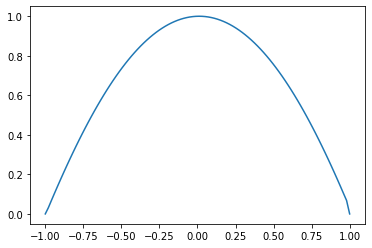

In [22]:
mas = []
X = np.linspace(-1,1,100,endpoint = True)
for x in X:
    mas.append(yn(x,C1,n))
plt.plot(X,mas)

# Метод коолокации

In [24]:
n = 100
M = [[scipy.integrate.quad(
    lambda x:
    (basic_func(x, j, 2) + q(x)*basic_func(x, j, 0))*(basic_func(x, i, 2) + q(x)*basic_func(x, i, 0)),-1,1)[0]
     for j in range(n)] for i in range(n)]

In [25]:
V = [scipy.integrate.quad(
    lambda x:
    f(x)*(basic_func(x,i,2) + q(x)*basic_func(x,i,0)),-1,1)[0]
    for i in range(n)]

In [26]:
%%time
n = 100
M = [[scipy.integrate.quad(
    lambda x:
    (basic_func(x, j, 2) + q(x)*basic_func(x, j, 0))*(basic_func(x, i, 2) + q(x)*basic_func(x, i, 0)),-1,1)[0]
     for j in range(n)] for i in range(n)]
V = [scipy.integrate.quad(
    lambda x:
    f(x)*(basic_func(x,i,2) + q(x)*basic_func(x,i,0)),-1,1)[0]
    for i in range(n)]
C2 = np.linalg.solve(M,V)
_x = Symbol('x')
_y1 = yn(_x,C2,n)

CPU times: user 7.94 s, sys: 546 ms, total: 8.49 s
Wall time: 7.75 s


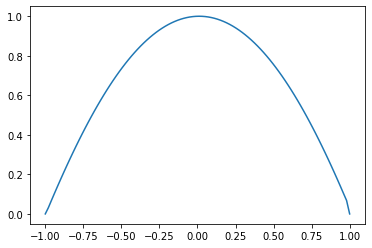

In [27]:
r = np.linspace(-1, 1, 100,endpoint = True)
mas1 = []
for x in r:
    mas1.append(yn(x,C1,n))
plt.plot(r,mas1)

# МНК

In [29]:
n = 100
M2 = [[scipy.integrate.quad(
     lambda x:
     (basic_func(x, j+1, 2) + q(x)*basic_func(x, j+1, 0))*basic_func(x,i+1,0),-1,1)[0]
     for j in range(n)]for i in range(n)]


In [30]:
%%time
n = 100
M2 = [[scipy.integrate.quad(
     lambda x:
     (basic_func(x, j+1, 2) + q(x)*basic_func(x, j+1, 0))*basic_func(x,i+1,0),-1,1)[0]
     for j in range(n)]for i in range(n)]
V2 = [scipy.integrate.quad(
     lambda x:
     -basic_func(x,i+1,0)*(basic_func(x,0,2)+q(x)*basic_func(x,0,0)-f(x)),-1,1)[0]
     for i in range(n)]
C3 = np.linalg.solve(M2,V2)
yn(-1,C3,n)

CPU times: user 5.01 s, sys: 14.2 ms, total: 5.02 s
Wall time: 5.01 s


0.0

In [32]:
yn(-1,C3,n)

0.0

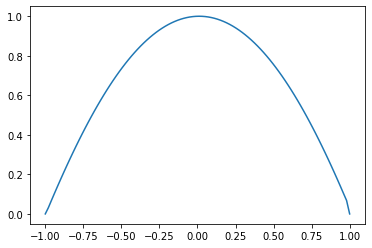

In [33]:
r2 = np.linspace(-1, 1, 100,endpoint = True)
mas2 = []
for x in r2:
    mas2.append(yn(x,C1,n))
plt.plot(r2,mas2)

# Галеркина

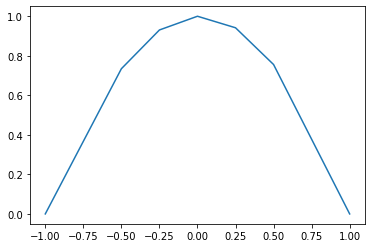

In [56]:
col_points4 = [-1,-1/2,-1/4,0,1/4,1/2,1]
n = 7
M4 = [[basic_func(x,j+1,2) + _q_2(x)*basic_func(x,j+1,0) 
       for j in range(n)] for x in col_points]
V4 = [_f_2(x) - (basic_func(x,0,2)+_q_2(x)*basic_func(x,0,0))
     for x in col_points]
C4 = np.linalg.solve(M2,V4)
mas4 = []
for x in col_points4:
    mas4.append(yn(x,C1,n))
plt.plot(col_points4,mas4)

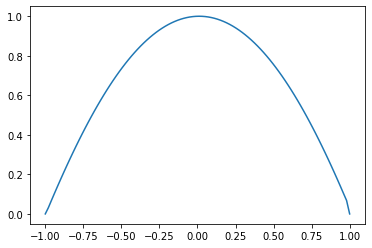

In [37]:
n = 100
M5 = [[scipy.integrate.quad(
    lambda x:
    (basic_func(x, j, 2) + _q_2(x)*basic_func(x, j, 0))*(basic_func(x, i, 2) + _q_2(x)*basic_func(x, i, 0)),-1,1)[0]
     for j in range(n)] for i in range(n)]
V5 = [scipy.integrate.quad(
    lambda x:
    _f_2(x)*(basic_func(x,i,2) + _q_2(x)*basic_func(x,i,0)),-1,1)[0]
    for i in range(n)]
C5 = np.linalg.solve(M5,V5)
r5 = np.linspace(-1, 1, 100,endpoint = True)
mas5 = []
for x in r5:
    mas5.append(yn(x,C1,n))
plt.plot(r5,mas5)

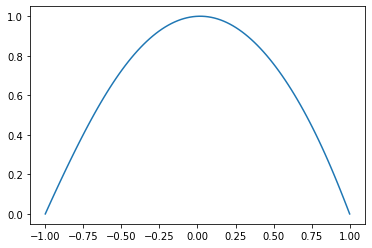

In [27]:
n = 100
M6 = [[scipy.integrate.quad(
     lambda x:
     (basic_func(x, j+1, 2) + _q_2(x)*basic_func(x, j+1, 0))*basic_func(x,i+1,0),-1,1)[0]
     for j in range(n)]for i in range(n)]
V6 = [scipy.integrate.quad(
     lambda x:
     -basic_func(x,i+1,0)*(basic_func(x,0,2)+_q_2(x)*basic_func(x,0,0)-_f_2(x)),-1,1)[0]
     for i in range(n)]
C6 = np.linalg.solve(M6,V6)
r6 = np.linspace(-1, 1, 100,endpoint = True)
mas6 = []
for x in r6:
    mas6.append(yn(x,C1,n))
plt.plot(r6,mas6)